In [1]:
import os
from PIL import Image
import torch

from diffusion.controlnet import ControlNetModel
from diffusion.pipeline_controlnet import StableDiffusionControlNetPipeline
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image

device = "cuda:0"

### Set model paths

In [2]:
base_model_path = "runwayml/stable-diffusion-v1-5"      # NOTE: set as the base Stable Diffusion model
controlnet_path = "./runs/controlnet_fill50k_6"           # NOTE: set as the output directory of your ControlNet training

### Load models and scheduler

In [3]:
# Load ControlNet
controlnet = ControlNetModel.from_pretrained(
    controlnet_path, 
    torch_dtype=torch.float16
)
# Load Stable Diffusion with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, 
    controlnet=controlnet, 
    torch_dtype=torch.float16,
    safety_checker=None,
)
# Set scheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Load model to GPU
pipe.to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/root/miniconda3/envs/pa3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You have disabled the safety checker for <class 'diffusion.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/

StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.28.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusion.controlnet",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Load condition for ControlNet

Prompt: forest green circle with an antique brown background


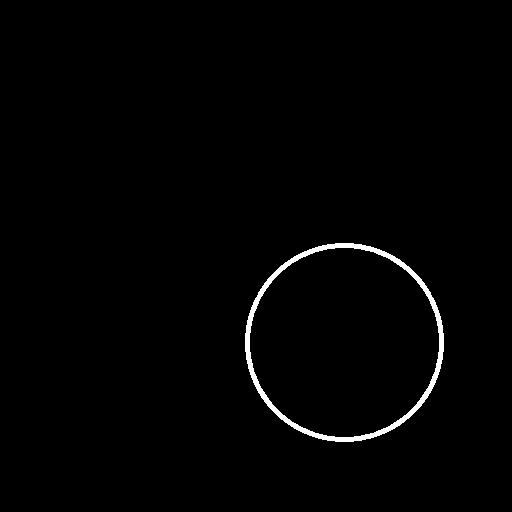

In [4]:
control_image = load_image("./data/test_conditions/4.jpg")
prompt = "forest green circle with an antique brown background"

print(f"Prompt: {prompt}")
control_image

  0%|          | 0/20 [00:00<?, ?it/s]

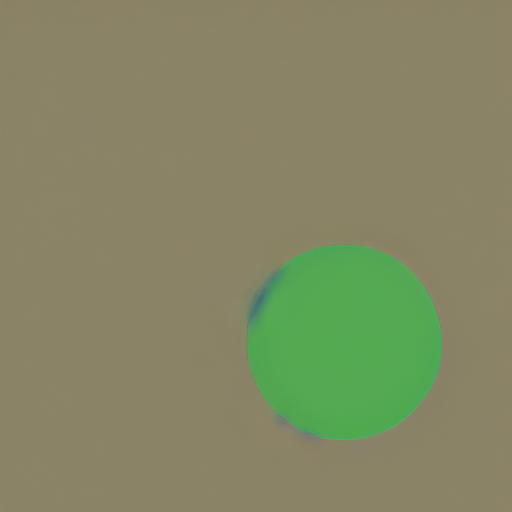

In [5]:
seed = 10
generator = torch.manual_seed(seed)

# Generate image
image = pipe(
    prompt, 
    num_inference_steps=20, 
    generator=generator, 
    image=control_image
).images[0]

image.save("./output4.png")
image


Prompt: pale golden rod circle with old lace background


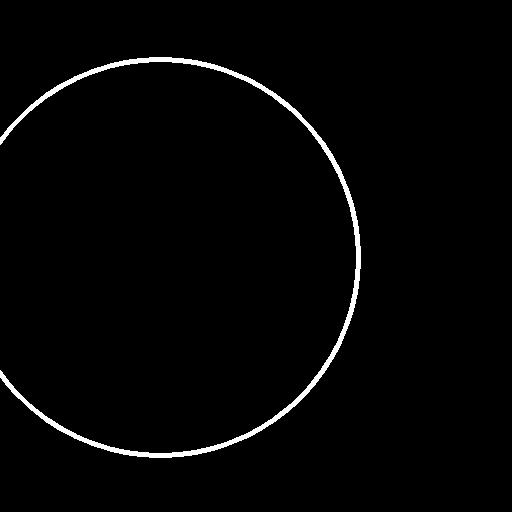

  0%|          | 0/20 [00:00<?, ?it/s]

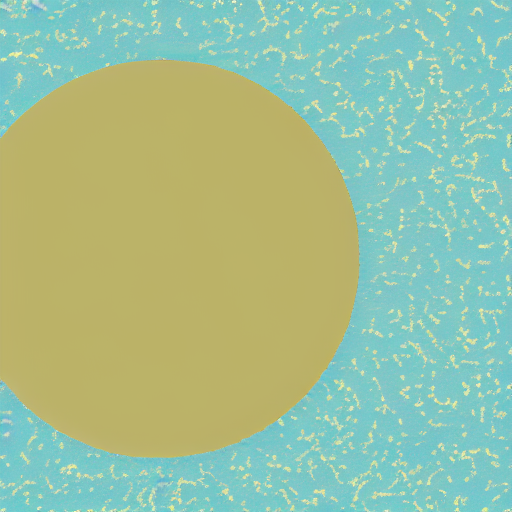

Prompt: sea green circle with a light cyan background


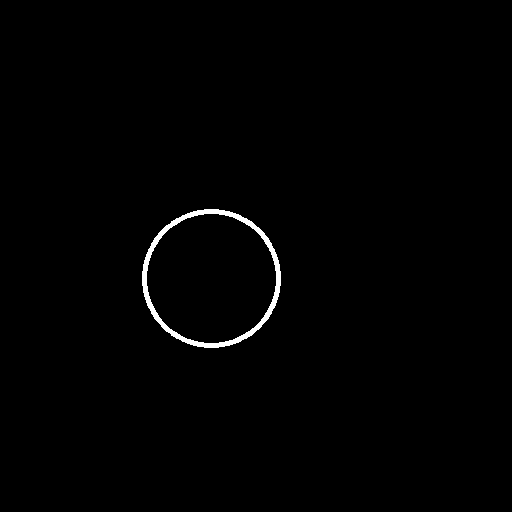

  0%|          | 0/20 [00:00<?, ?it/s]

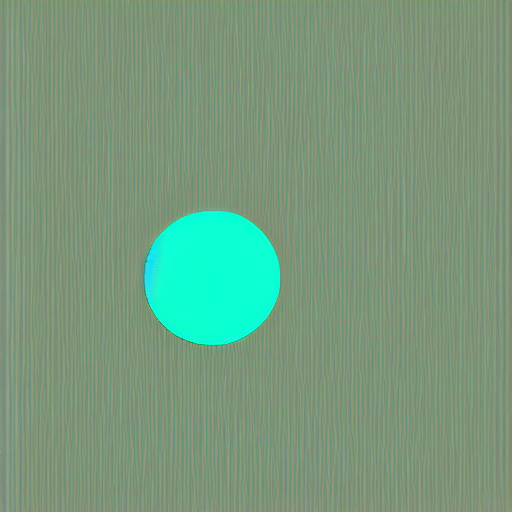

Prompt: deep sky blue circle with a light yellow background


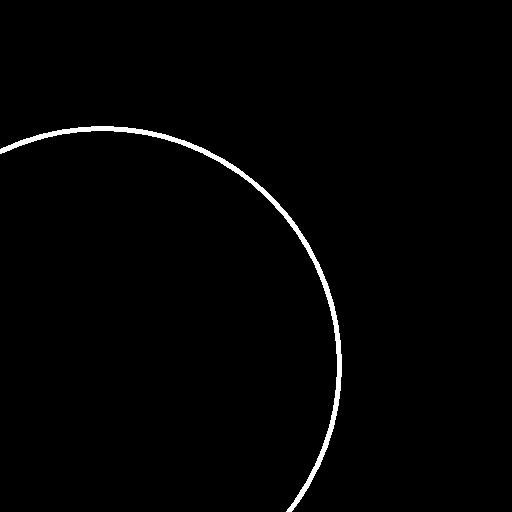

  0%|          | 0/20 [00:00<?, ?it/s]

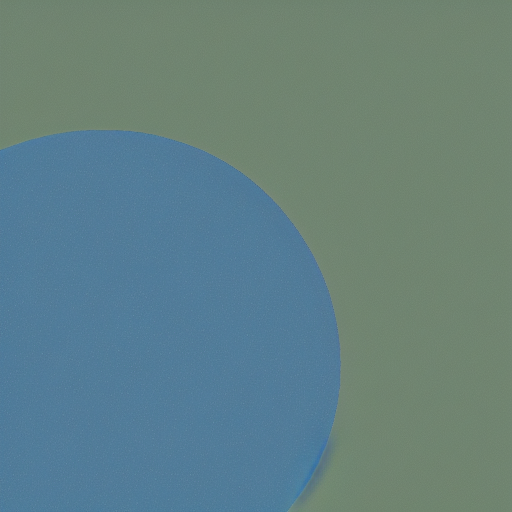

Prompt: rosy brown circle with a misty rose background


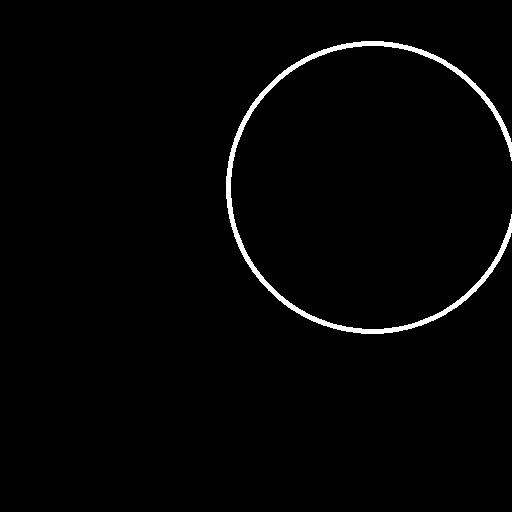

  0%|          | 0/20 [00:00<?, ?it/s]

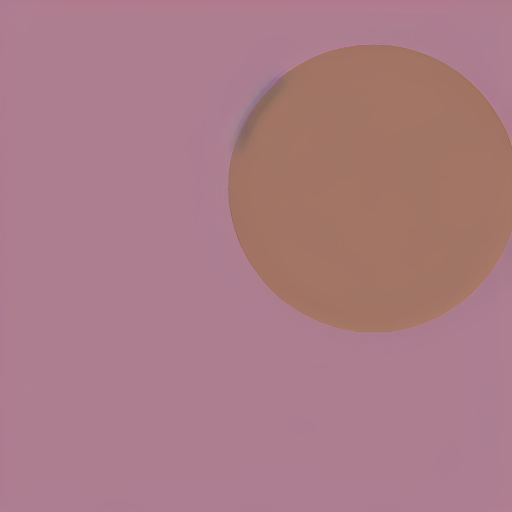

Prompt: forest green circle with an antique brown background


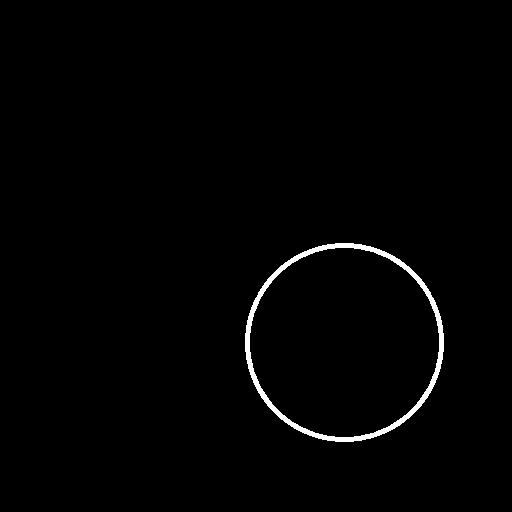

  0%|          | 0/20 [00:00<?, ?it/s]

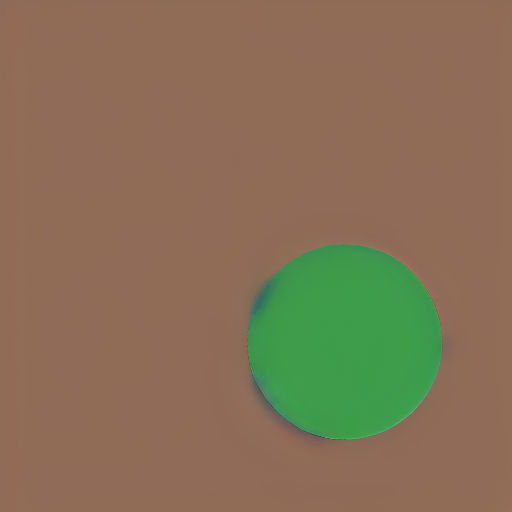

In [6]:
# test prompts
# {
#     "0": "pale golden rod circle with old lace background",
#     "1": "sea green circle with a light cyan background",
#     "2": "deep sky blue circle with a light yellow background",
#     "3": "rosy brown circle with a misty rose background",
#     "4": "forest green circle with an antique brown background"
# }

# test conditioning images
# task_1_controlnet/data/test_conditions/0.png
# task_1_controlnet/data/test_conditions/1.png
# task_1_controlnet/data/test_conditions/2.jpg
# task_1_controlnet/data/test_conditions/3.jpg
# task_1_controlnet/data/test_conditions/4.jpg

# generate images
seed = 10
generator = torch.manual_seed(seed)

test_prompts = [
    "pale golden rod circle with old lace background",
    "sea green circle with a light cyan background",
    "deep sky blue circle with a light yellow background",
    "rosy brown circle with a misty rose background",
    "forest green circle with an antique brown background"
]
test_conditioning_images = [
    "./data/test_conditions/0.png",
    "./data/test_conditions/1.png",
    "./data/test_conditions/2.jpg",
    "./data/test_conditions/3.jpg",
    "./data/test_conditions/4.jpg"
]

for i, (prompt, conditioning_image) in enumerate(zip(test_prompts, test_conditioning_images)):
    control_image = load_image(conditioning_image)
    print(f"Prompt: {prompt}")
    control_image.show()
    image = pipe(
        prompt, 
        num_inference_steps=20, 
        generator=generator, 
        image=control_image
    ).images[0]
    image.save(f"./output{i}.png")
    image.show()